In [1]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/Book2.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/content/Book2.csv')
print(df)

       food  odor  taste  chemical_composition  safe_to_eat  \
0  Chicken    1.0    0.8                   0.3            0   
1  Spinach    0.0    0.9                   0.7            1   
2      Beef   0.2    0.6                   0.5            0   
3      Milk   0.0    0.2                   0.1            1   

                          symptoms  \
0       Nausea, vomiting, diarrhea   
1                              NaN   
2  Abdominal pain, vomiting, fever   
3                              NaN   

                                       treatment  \
0  drink plenty of water,seek medicals attention   
1                                            NaN   
2      Seek medical attention, avoid dehydration   
3                                            NaN   

                                        prevention  
0  Cook chick thoroughly,avoid cross contamination  
1               Wash thoroughly before consumption  
2                    Cook beef to safe temperature  
3                   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  4 non-null      object 
 1   odor                  4 non-null      float64
 2   taste                 4 non-null      float64
 3   chemical_composition  4 non-null      float64
 4   safe_to_eat           4 non-null      int64  
 5   symptoms              2 non-null      object 
 6   treatment             2 non-null      object 
 7   prevention            4 non-null      object 
dtypes: float64(3), int64(1), object(4)
memory usage: 384.0+ bytes


In [13]:
# Assuming df is your DataFrame
X = df.iloc[:,1:2].values  #features
y = df.iloc[:,2].values  # Target variable

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [15]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(x)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -2.2616521739130437
Mean Squared Error: 0.010575000000000001
R-squared: 0.8528695652173913


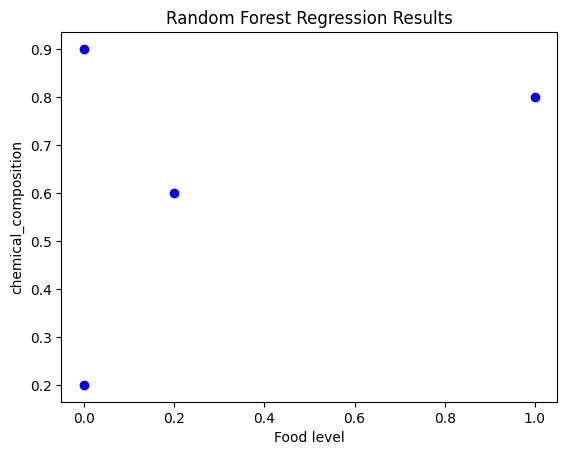

In [16]:
import numpy as np
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X,y, color='blue') #plotting real points

plt.title("Random Forest Regression Results")
plt.xlabel('Food level')
plt.ylabel('chemical_composition')
plt.show()

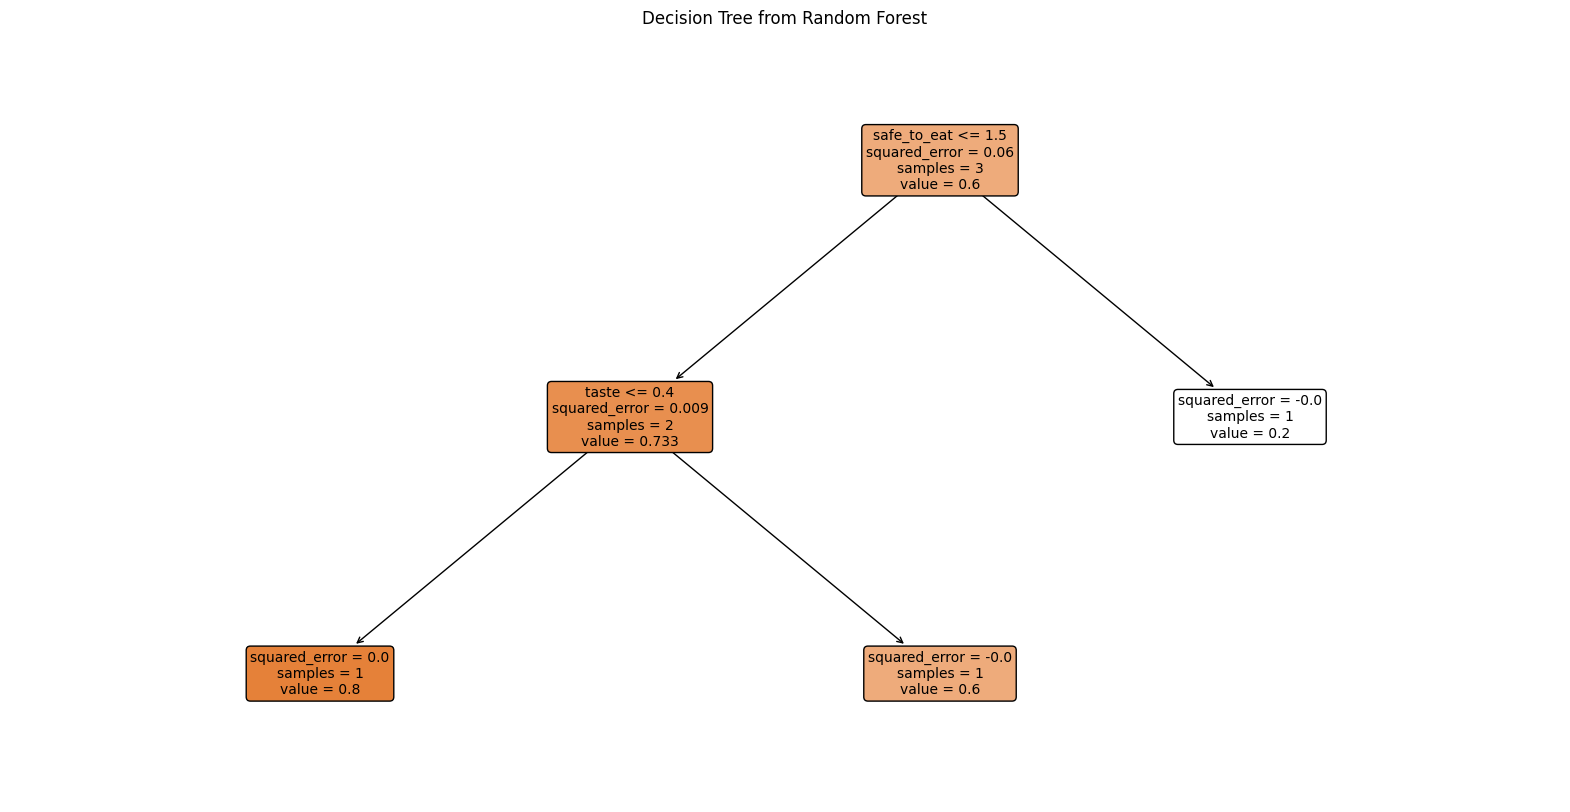

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()